## Funktionalen Zusammenhang finden

Eine Probe eines neuartigen Materials "Unobtainiumoxid" wird in einer Vakuumkammer erhitzt. Dabei werden ihre thermischen Eigenschaften über einen weiten Temperaturbereich gemessen. Für verschiedene Temperaturen $T$ wird die thermische Leistung $P$ (Energieabgabe pro Zeit) des Materials aufgezeichnet.

Die Messpunkte finden Sie in der `pandas.Series` namens `thermal`. Der Index bezeichnet die Temperatur $T$ der Probe in Kelvin ($\text{K}$), die Werte die thermische Leistung $P$ in Watt ($\text{W}$). Beide Messgrößen sind mit einem (unbekannten) Fehler behaftet.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
thermal = pd.read_csv('data/thermal.csv', index_col=0).squeeze()
thermal

Temperatur in °C
0.108392       1.608214e-02
0.139828       1.821717e-02
0.185540       2.381200e-02
0.251267       3.061030e-02
0.373841       5.290017e-02
0.503901       5.912813e-02
0.675179       9.777424e-02
0.957907       1.290450e-01
1.261044       2.014610e-01
1.908616       2.761857e-01
2.433267       3.704998e-01
3.764576       4.231055e-01
4.921487       6.385641e-01
6.881456       1.049885e+00
8.421108       1.280193e+00
12.738522      1.584518e+00
18.278866      2.623136e+00
22.386891      3.515454e+00
32.496040      5.245666e+00
45.813173      9.702391e+00
57.031085      1.297444e+01
89.017805      5.104752e+01
127.347605     1.780539e+02
155.973601     3.794232e+02
234.708146     1.889101e+03
287.179134     3.742621e+03
435.333448     1.930663e+04
534.407648     4.443626e+04
897.056595     3.635028e+05
1181.017266    1.234750e+06
Name: Thermische Leistung, dtype: float64

### Grafische Darstellung
Stellen Sie die Messwerte grafisch dar. Nutzen Sie eine sinnvolle Darstellung mit Titel, Achsenbeschriftungen, Achsenskalierung und ggf. Legende.

<Axes: title={'center': 'Thermische Leistung'}, xlabel='Temperatur in K', ylabel='Leistung in W'>

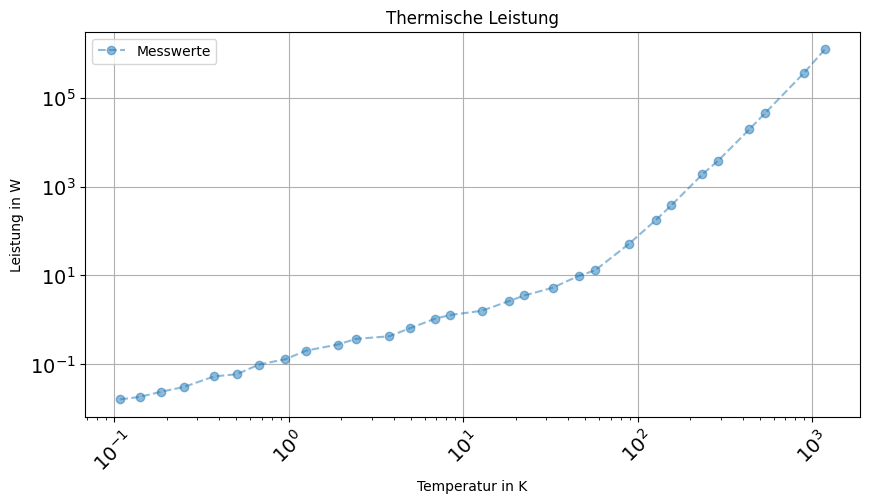

In [6]:
thermal_plot = pd.Series(thermal.values, index=thermal.index)
thermal_plot.plot(kind='line',
                title=thermal.name,
                xlabel='Temperatur in K',
                ylabel='Leistung in W',
                grid=True,
                loglog=True,
                figsize=(10, 5),
                label='Messwerte',
                legend=True,
                style='o--',
                alpha=0.5,
                fontsize=14,
                rot=45)
            

### Funktionaler Zusammenhang
Bestimmen Sie aus Ihrem Graphen: Welcher *funktionale Zusammenhang* besteht zwischen Temperatur der Probe und Leistungsabgabe
  * bei "geringer" Temperatur?
  * bei "hoher" Temperatur?
  
Sie müssen keine Vorfaktoren bestimmen. Es reicht, wenn Sie feststellen, ob die Leistungsabgabe mit steigender Temperatur linear, quadratisch, logarithmisch, exponentiell, oder auf sonstige Weise zunimmt.

<Axes: xlabel='Temperatur in K', ylabel='Leistung in W'>

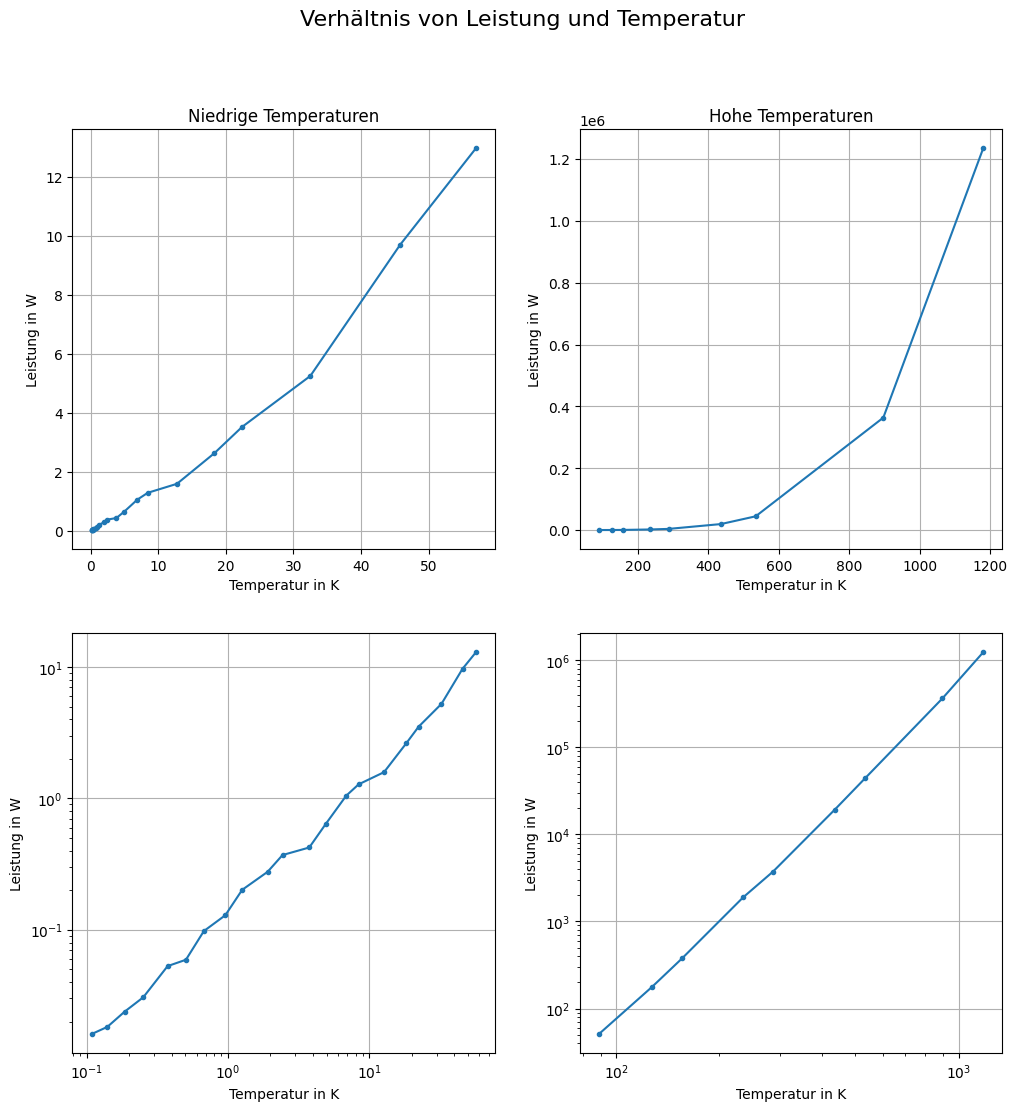

In [14]:
border = 60
thermal_high = pd.Series(thermal[thermal.index > border].values, index=thermal[thermal.index > border].index)
thermal_low = pd.Series(thermal[thermal.index < border].values, index=thermal[thermal.index < border].index)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

fig.suptitle('Verhältnis von Leistung und Temperatur', fontsize=16)


thermal_low.plot(kind='line',
                ax=ax1,
                title='Niedrige Temperaturen',
                xlabel='Temperatur in K',
                ylabel='Leistung in W',
                grid=True,
                style='.-'
                )

thermal_low.plot(kind='line',
                ax=ax3,
                xlabel='Temperatur in K',
                ylabel='Leistung in W',
                loglog=True,
                grid=True,
                style='.-'
                )


thermal_high.plot(kind='line',
                ax=ax2,
                title='Hohe Temperaturen',
                xlabel='Temperatur in K',
                ylabel='Leistung in W',
                grid=True,
                style='.-'
                )

thermal_high.plot(kind='line',
                ax=ax4,
                xlabel='Temperatur in K',
                ylabel='Leistung in W',
                loglog=True,
                grid=True,
                style='.-'
                )




Es ist zu erkennen, das bei Unterteilung der Werte in niedrige und hohe Temperaturen, am Wert 60 K ist zu erkenne, dass beide Bereiche für sich einer Potenzfunktion folgen.
Die Steigung des LogLog-Diabramms ist bei niedrigen Temperaturen ca. 1 und bei hohen Temperaturen ca. 4.